# Multimodal Use Cases

In [16]:
# Standard library imports
import base64
import warnings

# Third-party imports
from dotenv import load_dotenv
from IPython.display import Image, Markdown

# Local imports
from utils import llama32

# Suppress warnings
warnings.filterwarnings('ignore')

# Load environment variables
load_dotenv()


True

## OCR with Images

In [7]:
# encode local image to base64 

def encode_image(image_path):
    with open(image_path,'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# create a helper function to make image based conversation easier 

def llama32pi(prompt, image_path, model_size = 90):
    messages = [
        {'role':'user', 'content': [
            {'type': 'text', 'text': prompt},
            {'type': 'image_url', 'image_url': {'url': image_path}}
        ]}
    ]
    response = llama32(messages, model_size= model_size)
    return response 

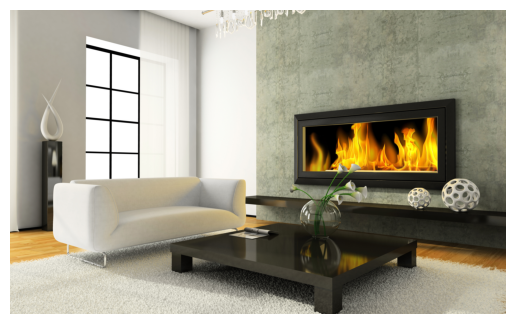

In [14]:
display(Image(filename = "./images/001.jpeg"))

In [19]:
Markdown(llama32pi('What would be an estimated cost to build a living room like this in Dallas, TX?', f'data:image/jpeg;base64,{encode_image("./images/001.jpeg")}'))

The estimated cost to build a living room like this in Dallas, TX can vary greatly depending on several factors such as the size of the room, materials used, and labor costs. However, here are some rough estimates for the different elements of the room:

* Fireplace: $5,000 - $10,000
* Sofa: $1,000 - $3,000
* Coffee table: $500 - $1,000
* Rug: $500 - $1,000
* Lighting fixtures: $500 - $1,000
* Decorative items: $500 - $1,000

Overall, the total cost to build a living room like this in Dallas, TX could range from $8,000 to $20,000 or more, depending on the specific materials and labor costs chosen. It's important to note that these estimates are rough and may vary depending on the specific circumstances of the project.

## Handling Multiple Images

Image 1 dimensions: 796 1181
Image 2 dimensions: 954 1245
Image 3 dimensions: 812 1161
Merged image dimensions: (2562, 1245)


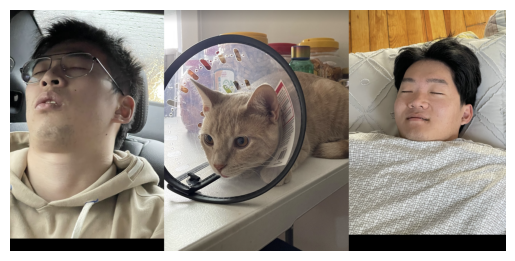

In [32]:
from utils import merge_images
import matplotlib.pyplot as plt

merged_image = merge_images("./images/sleep.png", "./images/cat2.png", "./images/korean.png")
plt.imshow(merged_image)
plt.axis('off')
plt.show()
    


If an image has a dimension larger than 1120 pixels, you should resize it before passing it to llama32 and maintain the aspect ratio


In [33]:
from utils import resize_image

resized_image = resize_image(merged_image) # the image is saved to resized_image.jpg in the same folder as others

Original size: 2562 x 1245
New size: 1120 x 544


Now this image should be ready to be passed to llama32

In [37]:
Markdown(llama32pi('Dsecribe the image in a funny way', f'data:image/jpeg;base64,{encode_image("./images/resized_image.jpg")}'))


The image is a collage of three photos, each depicting a person or animal in a state of relaxation or sleep. The first photo shows a man with dark hair and glasses, wearing a tan hoodie, with his head tilted back and mouth open, as if he is sleeping or dozing off. The second photo features a cat with light-colored fur, wearing a clear plastic cone around its neck, lying on a white table or countertop. The third photo shows a man with dark hair, lying on his back with his eyes closed, covered by a white blanket or sheet.

The overall atmosphere of the image suggests that the individuals and animal are all feeling relaxed and comfortable, perhaps even a bit sleepy or tired. The use of soft colors and gentle lighting adds to the calming ambiance of the image, making it feel like a peaceful and serene scene.

## Generate code from images

In [42]:
from utils import disp_image

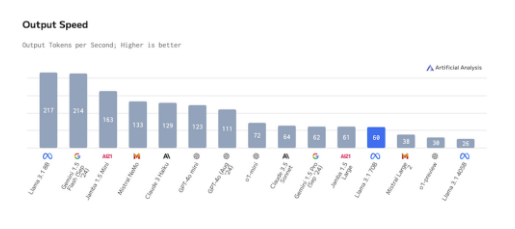

In [44]:
disp_image("./images/llama31speed.png")


In [45]:
question = "convert this chart to an html table"

base64_image = encode_image("./images/llama31speed.png")

result = llama32pi(question, f'data:image/jpeg;base64,{base64_image}')

print(result)


The chart displays the output speed of various models, measured in output tokens per second. The data is presented in a bar graph format, with the model names listed on the x-axis and the corresponding output speeds on the y-axis.

To convert this chart to an HTML table, we can use the following code:

```html
<table>
  <caption>Output Speed</caption>
  <thead>
    <tr>
      <th>Model</th>
      <th>Output Speed (tokens/second)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Llama 2 1.5B</td>
      <td>217</td>
    </tr>
    <tr>
      <td>LLaMA 2 7B</td>
      <td>214</td>
    </tr>
    <tr>
      <td>LLaMA 2 13B</td>
      <td>163</td>
    </tr>
    <tr>
      <td>LLaMA 2 70B</td>
      <td>133</td>
    </tr>
    <tr>
      <td>LLaMA 2 175B</td>
      <td>129</td>
    </tr>
    <tr>
      <td>LLaMA 2 350B</td>
      <td>123</td>
    </tr>
    <tr>
      <td>LLaMA 2 1T</td>
      <td>111</td>
    </tr>
    <tr>
      <td>LLaMA 2 2T</td>
      <td>79</td>
    </tr>
    <tr>
   

In [48]:
# Display the model in html format 
from IPython.display import HTML

HTML(
    """
    <table>
  <caption>Output Speed</caption>
  <thead>
    <tr>
      <th>Model</th>
      <th>Output Speed (tokens/second)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Llama 2 1.5B</td>
      <td>217</td>
    </tr>
    <tr>
      <td>LLaMA 2 7B</td>
      <td>214</td>
    </tr>
    <tr>
      <td>LLaMA 2 13B</td>
      <td>163</td>
    </tr>
    <tr>
      <td>LLaMA 2 70B</td>
      <td>133</td>
    </tr>
    <tr>
      <td>LLaMA 2 175B</td>
      <td>129</td>
    </tr>
    <tr>
      <td>LLaMA 2 350B</td>
      <td>123</td>
    </tr>
    <tr>
      <td>LLaMA 2 1T</td>
      <td>111</td>
    </tr>
    <tr>
      <td>LLaMA 2 2T</td>
      <td>79</td>
    </tr>
    <tr>
      <td>LLaMA 2 3T</td>
      <td>64</td>
    </tr>
    <tr>
      <td>LLaMA 2 4T</td>
      <td>62</td>
    </tr>
    <tr>
      <td>LLaMA 2 5T</td>
      <td>61</td>
    </tr>
    <tr>
      <td>LLaMA 2 6T</td>
      <td>68</td>
    </tr>
    <tr>
      <td>LLaMA 2 7T</td>
      <td>38</td>
    </tr>
    <tr>
      <td>LLaMA 2 8T</td>
      <td>38</td>
    </tr>
    <tr>
      <td>LLaMA 2 9T</td>
      <td>25</td>
    </tr>
  </tbody>
</table>
""")

Model,Output Speed (tokens/second)
Llama 2 1.5B,217
LLaMA 2 7B,214
LLaMA 2 13B,163
LLaMA 2 70B,133
LLaMA 2 175B,129
LLaMA 2 350B,123
LLaMA 2 1T,111
LLaMA 2 2T,79
LLaMA 2 3T,64
LLaMA 2 4T,62


# Tool Calling